In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
corolla = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')


In [21]:
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
corolla = corolla[selected_columns]

In [22]:
print(corolla.isnull().sum())

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64


In [23]:
X = corolla.drop("Price", axis=1)
y = corolla["Price"]

In [24]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

In [25]:
vif_results = calculate_vif(X)
print("VIF Results:")
print(vif_results)

VIF Results:
        Variable         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()


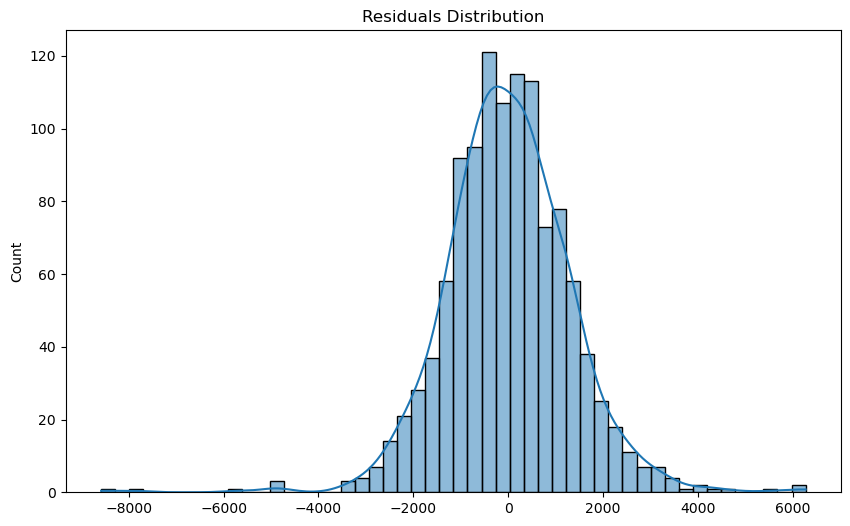

In [28]:
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [29]:
y_pred = model.predict(sm.add_constant(X_test))
r_squared = np.corrcoef(y_test, y_pred)[0, 1] ** 2
print("R-squared value:", r_squared)

R-squared value: 0.8541704509238291


In [32]:
influence = model.get_influence()
cooks_distance = influence.cooks_distance
leverage_cutoff = 4 / len(X_train)

In [33]:
cooks_distance_values = cooks_distance[0]
influential_points = np.where(cooks_distance_values > leverage_cutoff)[0]

In [35]:
X_train = X_train.drop(X_train.index[influential_points])
y_train = y_train.drop(y_train.index[influential_points])

In [36]:
final_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [37]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1201.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:56:01   Log-Likelihood:                -9070.1
No. Observations:                1087   AIC:                         1.816e+04
Df Residuals:                    1078   BIC:                         1.820e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.427e+04   1554.032     -9.184